# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [3]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [36]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
mnist data directory already exists, download aborted


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore you can do the following:
  - Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.
  
Hopefully, this implementation of a neural network is clear after your investigation. You should be able to answer following questions:
  - Which cost function is used, what is its derivation and how is it implemented?
  - Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
  - How does the network implement the backpropagation algorithm?

Epoch: 0 Accuracy: 0.9415 Delta: -0.14625877951363583
0 0.9415
Epoch: 1 Accuracy: 0.9561 Delta: -0.10825622347166174
1 0.9561
Epoch: 2 Accuracy: 0.9625 Delta: -0.08223959337684093
2 0.9625
Epoch: 3 Accuracy: 0.9646 Delta: -0.06927645419738085
3 0.9646
Epoch: 4 Accuracy: 0.9666 Delta: -0.06254370035329403
4 0.9666
Epoch: 5 Accuracy: 0.9684 Delta: -0.05542531113088508
5 0.9684
Epoch: 6 Accuracy: 0.9704 Delta: -0.05189159048314188
6 0.9704
Epoch: 7 Accuracy: 0.9711 Delta: -0.04986713777094591
7 0.9711
Epoch: 8 Accuracy: 0.9724 Delta: -0.04627392088125384
8 0.9724
Epoch: 9 Accuracy: 0.972 Delta: -0.04413537415111178
9 0.972
Epoch: 10 Accuracy: 0.9724 Delta: -0.04130218541421942
10 0.9724
Epoch: 11 Accuracy: 0.9737 Delta: -0.037527489791031154
11 0.9737
Epoch: 12 Accuracy: 0.9746 Delta: -0.035757071002013106
12 0.9746
Epoch: 13 Accuracy: 0.9755 Delta: -0.03412145312117636
13 0.9755
Epoch: 14 Accuracy: 0.9757 Delta: -0.032311800880716
14 0.9757
Epoch: 15 Accuracy: 0.9759 Delta: -0.0290802507

(-1, 0)

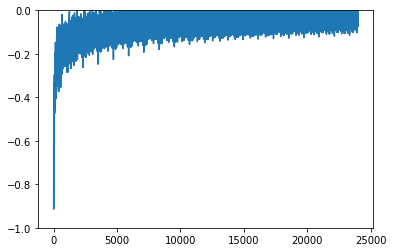

In [50]:
delta_hist =[]

def feed_forward(X, weights):
    """Preforms the forward pass.
    
    Retrieves the inputs and the weights.
    And does a matrix multiplication
    
    
        Args:
            X: A batch of inputs
            weights: The weights
            
        Returns:
            A batch of calculated outputs
        
    """
    
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0)) # probably it takes element from right (in our case it takes just mnist data (10000, 784); np.max... is comparing max element-wise with 0
        # we multiply one each with all weights
    return a # a.append(max(Wx, 0))

def grads(X, Y, weights):
    """Calculates the gradiants and preforms the backpropagation
    
    This function calculates the gradients and passes the 
    new weights together with the inputs to forward pass.
    
        Args:
            X: A batch of inputs
            Y: A batch of labels
            weights: weights to calculate the new gradient
        
        Returns:
            The new gradients

    """
    
    grads = np.empty_like(weights) # initialize grads with the same shape and type as weights
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y # distance between output and real label
    
    
    delta_hist.append(np.sum(delta*Y)/len(X)) # history
    grads[-1] = a[-2].T.dot(delta) # Look Andrew NG backprop. # This is start value of grads. Dont forget a was changed it is not X anymore
    for i in range(len(a)-2, 0, -1): # backprop # but what is len(a)-2? # range(start, finish, step)
        delta = (a[i] > 0) * delta.dot(weights[i].T)
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X) # ?

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
num_epochs, batch_size, learn_rate = 20, 50, 0.1
verbose = True
for i in range(num_epochs):
    for j in range(0, len(trX), batch_size): # range(start, finish, step)
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size]
        weights -= learn_rate * grads(X, Y, weights)
        once = False
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1)
    if verbose: 
        print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(teY, axis=1)), 'Delta:', delta_hist[-1])
    print (i, np.mean(prediction_test == np.argmax(teY, axis=1)))
plt.plot(delta_hist)
plt.ylim(ymax = 0, ymin= -1)

In [51]:
trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
X = teX
a = [X]
a = a[-1]
print(a.shape)
print(a[-2].shape)
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]]
grads = np.empty_like(weights)
print(grads.shape)
print(grads[-1])

for i in range(1, 5, 2):
    print(i)

(10000, 784)
(784,)
(3,)
None
1
3


## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of the course. 

Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

Epoch: 0 Accuracy: 0.8677 Delta: -0.29009037036125973
Epoch: 1 Accuracy: 0.8995 Delta: -0.23234322683561384
Epoch: 2 Accuracy: 0.9141 Delta: -0.20554384564647593
Epoch: 3 Accuracy: 0.9229 Delta: -0.18855186750532166
Epoch: 4 Accuracy: 0.9303 Delta: -0.1760347800046183
Epoch: 5 Accuracy: 0.934 Delta: -0.16655801821459756
Epoch: 6 Accuracy: 0.9373 Delta: -0.15879826444466097
Epoch: 7 Accuracy: 0.9394 Delta: -0.1524628477870241
Epoch: 8 Accuracy: 0.9412 Delta: -0.14678118151951622
Epoch: 9 Accuracy: 0.944 Delta: -0.14156810178861554
Epoch: 10 Accuracy: 0.9458 Delta: -0.13684954355681925
Epoch: 11 Accuracy: 0.947 Delta: -0.13292443048766608
Epoch: 12 Accuracy: 0.9486 Delta: -0.12927459392471477
Epoch: 13 Accuracy: 0.9505 Delta: -0.12624083144564727
Epoch: 14 Accuracy: 0.9515 Delta: -0.12307629612506635
Epoch: 15 Accuracy: 0.9527 Delta: -0.12032271593199641
Epoch: 16 Accuracy: 0.9532 Delta: -0.11759495369400401
Epoch: 17 Accuracy: 0.9546 Delta: -0.1149147832510793
Epoch: 18 Accuracy: 0.9556

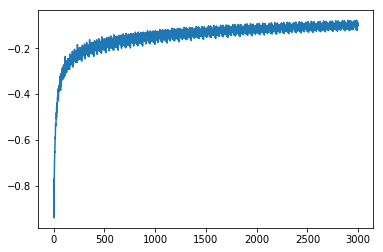

In [52]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.weights = [np.random.randn(*weight) * 0.1 for weight in self.layers]
        self.delta_hist = []
        
    def forward(self, data):
        a = [data]
        for weight in self.weights:
            a.append(np.maximum(a[-1].dot(weight), 0))
            
        return a

    def backward(self, X, Y):
        grads = np.empty_like(self.weights)
        a = self.forward(X)
        delta = a[-1] - Y

        self.delta_hist.append(np.sum(delta * Y) / len(X))
        grads[-1] = a[-2].T.dot(delta)
        
        for i in range(len(a) - 2, 0, -1):
            delta = (a[i] > 0) * delta.dot(self.weights[i].T)
            grads[i - 1] = a[i - 1].T.dot(delta)

        return grads / len(X)


    def predict(self, data):
        return self.forward(data)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        self.network = network
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
    def sgd(self, verbose = True):        
        for i in range(self.epochs):
            for j in range(0, len(self.train_data), self.batch_size):
                X, Y = self.train_data[j:j + self.batch_size], self.train_labels[j:j + self.batch_size]
                self.network.weights -= self.learning_rate * self.network.backward(X, Y)

            prediction_test = np.argmax(self.network.predict(self.test_data)[-1], axis=1)
            if verbose: 
                print ('Epoch:', i, 'Accuracy:', np.mean(prediction_test == np.argmax(self.test_labels, axis=1)), 'Delta:', self.network.delta_hist[-1])
    
    

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 25, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate).sgd(True)

plt.plot(mnist_NN.delta_hist)